<a href="https://colab.research.google.com/github/Youssef-Rachad/PHY327/blob/main/PHY327_HALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHY327: HALL

- fix mV to V
- uncertainties package
- interpet and analyse
- plot and print
- reread notebook
- find source to corroborate plot trends and some values
- curve fit on subset of data


In [177]:
import pandas as pd
import numpy as np
from scipy import constants as sc
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

!pip install -q uncertainties
import uncertainties as unc
from uncertainties import unumpy as unp

# n-doped germanium sample

## Pariwise resistance

In [178]:
nGe_raw = pd.read_csv("nGe.csv")

# We correct the measurements by taking their absolute values
# (I think this is an inconsistency in my experimental setup
#  where the polarity of the wires may be inverted)
# Then convert the values from mV to V
nGe_raw[['V23','V12', 'V41', 'V34', 'V32', 'V21', 'V14', 'V43']] = \
 (1e-3) * np.abs(nGe_raw[['V23','V12', 'V41', 'V34', 'V32', 'V21', 'V14', 'V43']])

nGe = pd.DataFrame()
# Resistance calculation in [Ohm]
nGe['R14_23'] = nGe_raw['I14'] / nGe_raw['V23']
nGe['R43_12'] = nGe_raw['I43'] / nGe_raw['V12']
nGe['R32_41'] = nGe_raw['I32'] / nGe_raw['V41']
nGe['R12_34'] = nGe_raw['I12'] / nGe_raw['V34']
# Reversed orientation
nGe['R41_32'] = nGe_raw['I41'] / nGe_raw['V32']
nGe['R34_21'] = nGe_raw['I34'] / nGe_raw['V21']
nGe['R23_14'] = nGe_raw['I23'] / nGe_raw['V14']
nGe['R21_43'] = nGe_raw['I21'] / nGe_raw['V43']

# Since the voltage and current measurements are obtained using a DMM
# we can use .005 mA and .005 mV uncertainty
# Although the machine precision is better than this uncertainty,
#   the values were not stable beyond 2 decimal places when recording data
resistance_err = (unc.ufloat(1, 0.005) / unc.ufloat(1, 0.005)*(1e-3)).s
r_errs = np.ones(len(nGe['R12_34'])) * resistance_err
print(f"Error in resistance: {resistance_err:.3e} [Ohm]")

print("Raw voltages and currents\n", nGe_raw.head())
print("Resistances\n", nGe.head(10))

Error in resistance: 7.071e-06 [Ohm]
Raw voltages and currents
   Name     T   I14           V23   I43           V12   I32           V41  \
0  nGe  40.0  5.00  3.700000e-07  5.00  3.400000e-07  5.02  3.700000e-07   
1  nGe  60.0  5.05  1.800000e-07  5.03  1.600000e-07  5.03  1.800000e-07   
2  nGe  70.0  4.99  1.100000e-07  5.01  1.100000e-07  5.00  1.200000e-07   
3  nGe  75.0  5.02  9.800000e-05  5.07  9.500000e-05  5.07  9.300000e-05   
4  nGe  79.8  5.04  7.800000e-05  5.05  7.500000e-05  5.05  8.500000e-05   

    I12           V34   I41           V32   I34           V21   I23  \
0  5.02  3.400000e-07  5.00  3.700000e-07  5.00  3.400000e-07  5.02   
1  5.02  1.500000e-07  5.00  1.700000e-07  5.00  1.600000e-07  5.00   
2  5.01  1.100000e-07  5.00  1.200000e-07  4.99  1.000000e-07  5.00   
3  5.07  9.400000e-05  5.06  9.700000e-05  5.05  9.200000e-05  5.06   
4  5.00  7.000000e-05  5.05  8.100000e-05  5.05  7.700000e-05  5.04   

            V14   I21           V43  B_field  
0  3.

## Current reversal consistency

In [179]:
print(nGe_raw['T'])

0    40.0
1    60.0
2    70.0
3    75.0
4    79.8
5    85.0
6    90.0
Name: T, dtype: float64


In [180]:
print("We now check current reversal consistency for n-doped germanium sample (resistances in [Ohms]): \n",
      pd.concat([nGe_raw['T'],
                 np.abs(nGe['R14_23'] - nGe['R41_32']),
                 np.abs(nGe['R43_12'] - nGe['R34_21']),
                 np.abs(nGe['R32_41'] - nGe['R23_14']),
                 np.abs(nGe['R21_43'] - nGe['R12_34'])],
                axis=1, keys=['T', 'R41_32 - R14_23', 'R34_21 - R43_12', 'R23_14 - R32_41', 'R12_34 - R21_43'])
)

We now check current reversal consistency for n-doped germanium sample (resistances in [Ohms]): 
       T  R41_32 - R14_23  R34_21 - R43_12  R23_14 - R32_41  R12_34 - R21_43
0  40.0     0.000000e+00     0.000000e+00     0.000000e+00     0.000000e+00
1  60.0     1.356209e+06     1.875000e+05     1.467320e+06     2.216667e+06
2  70.0     3.696970e+06     4.354545e+06     0.000000e+00     4.454545e+06
3  75.0     9.404587e+02     1.522883e+03     2.351181e+03     1.558335e+03
4  79.8     2.269706e+03     1.748918e+03     2.810458e+03     6.813187e+03
5  85.0     4.626866e+03     2.542614e+03     6.098485e+03     6.499717e+03
6  90.0     8.237548e+03     9.150943e+03     9.526593e+02     1.768627e+03


We can see from above that the resistance calculations do  agree with each other under the current reversal consistency to a kOhm difference. At temperatures of 60c and 70C, there is significant disagreement.
This is likely due to an error when taking the data, I can attribute this to the faulty connectors which did not always pick up on the voltage and current passing through the sample.

## Reciprocity

The reciprocity theorem states that the sum of opposite pairs of measurements must agree with each other. The NIST guide outlines two such relations in the semiconductor samples:
$$R_{21,34} + R_{12,43} = R_{43,12} + R_{34,21}$$
$$R_{32,41} + R_{23,14} = R_{14,23} + R_{41,32}$$

We will verify this by computing the relative error for both relations in the sample and compare this to a 5% tolerance as described in the NIST guide.

Note the relative error between 2 quantities A and B is given by$$err_r=\left|\frac{B-A}{A}\right|$$

In [181]:
print("We will now verify the reciprocity theorem for pairs of opposite resistances in the samples",
      "\n(R41_32 + R14_23 - (R23_14 + R32_41)) / (R23_14 + R32_41)\n",
       pd.concat([nGe_raw['T'],(nGe['R41_32'] + nGe['R14_23'] - (nGe['R23_14'] + nGe['R32_41'])) / (nGe['R23_14'] + nGe['R32_41'])], axis=1),
      "\n(R34_21 + R43_12 - (R12_43 + R21_34)) / (R12_43 + R21_34)\n",
       pd.concat([nGe_raw['T'],(nGe['R34_21'] + nGe['R43_12'] - (nGe['R14_23'] + nGe['R41_32'])) / (nGe['R14_23'] + nGe['R41_32'])], axis=1),
      )

We will now verify the reciprocity theorem for pairs of opposite resistances in the samples 
(R41_32 + R14_23 - (R23_14 + R32_41)) / (R23_14 + R32_41)
       T         0
0  40.0 -0.003984
1  60.0  0.001937
2  70.0  0.044364
3  75.0 -0.030855
4  79.8  0.043796
5  85.0  0.057451
6  90.0  0.053599 
(R34_21 + R43_12 - (R12_43 + R21_34)) / (R12_43 + R21_34)
       T         0
0  40.0  0.088235
1  60.0  0.090837
2  70.0  0.096692
3  75.0  0.047106
4  79.8  0.046917
5  85.0 -0.000665
6  90.0  0.111805


In the first reciprocity relation, most values fall below the 5% tolerance and non exceed 6%.

However, in the second reciprocity relation, most values exceed this tolerance and agree with each other to a 10% tolerance instead.

## $R_A, R_B, R_S$

In [182]:
from uncertainties.umath import *

def compute_resistance(RA, RB, tolerance):
  zprev = 0
  z = 2 * np.log(2) / (np.pi*(RA + RB))

  while np.abs((z - zprev) / z) > tolerance:
    zprev = z
    y = 1/exp(np.pi*z*RA) + 1/exp(np.pi*z*RB)
    z = z - (1-y)/np.pi / (RA / exp(np.pi*z*RA) + RB/exp(np.pi*z*RB))

  return abs(1/z) # value of RS

In [183]:
# First we compute intermediary resistance values
# The error in RA and RB is the same as the resistance error since it's averaged out to the same value
nGe['RA'] = (nGe['R41_32'] + nGe['R14_23'] + nGe['R23_14'] + nGe['R32_41']) / 4
nGe['RB'] = (nGe['R34_21'] + nGe['R43_12'] + nGe['R14_23'] + nGe['R41_32']) / 4

# Now we obtain resistance via a relaxation algorithm (outlined by NIST guide)
tolerance = 5e-5
nGe['RS'] = [compute_resistance(ra, rb, tolerance) for ra, rb in zip(nGe['RA'], nGe['RB'])]
RS_err = unp.std_devs([compute_resistance(ra, rb, tolerance) for ra, rb in
                       zip(unp.uarray(nGe['RA'], np.ones(len(nGe['RA']))), unp.uarray(nGe['RB'], np.ones(len(nGe['RB']))))])

print("Uncertainty in RS values [Ohm]:\n", RS_err)

print("Resistance values [Ohm] obtained at varying temperatures\n", pd.concat([nGe_raw['T'], nGe['RS']], axis=1))

Uncertainty in RS values [Ohm]:
 [3.20565967 3.20583102 3.20708055 3.20488894 3.20578904 3.20521064
 3.20788396]
Resistance values [Ohm] obtained at varying temperatures
       T            RS
0  40.0  6.265122e+07
1  60.0  1.331021e+08
2  70.0  1.998177e+08
3  75.0  2.389220e+05
4  79.8  2.880242e+05
5  85.0  3.472403e+05
6  90.0  4.153935e+05


## $V_C, V_D, V_E, V_F$

In [184]:
nGeBplus = pd.read_csv("nGepositive.csv")
nGeBminus = pd.read_csv("nGenegative.csv")

# Because measurements were not made correctly according to the van der Pauw method
# for VC, VD, VE, VF, I am approximating the voltage across opposite corners of the sample as
# the euclidean distance of the voltage across pairs of adjacent corners of the sample.
# The idea behind this approximation is that the potential field can be somewhat modelled as a euclidean space
# where each unit of distance represents 1V. This approximation is evidently very dubious,
# however it allows me to recover a possible value for the charge carrier sheet density with the collected data.
# Given more time, additional (and correct) data can be collected.

nGeBplus['V24'] = np.sqrt(nGeBplus['V23']**2 + nGeBplus['V34']**2)
nGeBminus['V24'] = np.sqrt(nGeBminus['V23']**2 + nGeBminus['V34']**2)

nGeBplus['V42'] = np.sqrt(nGeBplus['V32']**2 + nGeBplus['V43']**2)
nGeBminus['V42'] = np.sqrt(nGeBminus['V32']**2 + nGeBminus['V43']**2)

nGeBplus['V13'] = np.sqrt(nGeBplus['V12']**2 + nGeBplus['V23']**2)
nGeBminus['V13'] = np.sqrt(nGeBminus['V12']**2 + nGeBminus['V23']**2)

nGeBplus['V31'] = np.sqrt(nGeBplus['V21']**2 + nGeBplus['V32']**2)
nGeBminus['V31'] = np.sqrt(nGeBminus['V21']**2 + nGeBminus['V32']**2)

nGe['VC'] = nGeBplus['V42'] - nGeBminus['V42']
nGe['VD'] = nGeBplus['V24'] - nGeBminus['V24']
nGe['VE'] = nGeBplus['V13'] - nGeBminus['V13']
nGe['VF'] = nGeBplus['V31'] - nGeBminus['V31']

## Charge carrier density

In [185]:
# since the manual expects a single current measurement for all 4 voltages,
# I am taking the average of the currents corresponding to the voltages involved in the above calculation
# this will allow me to account for the differences in the currents that passed throught the semiconductor at each pair of points.
# Note that since the current value is controlled from the electronic box,
# it is reasonable to expect this total current to flow across terminals of the sample
currents = [nGeBplus['I14'], nGeBminus['I14'],
            nGeBplus['I41'], nGeBminus['I41'],
            nGeBplus['I43'], nGeBminus['I43'],
            nGeBplus['I34'], nGeBminus['I34'],
            nGeBplus['I32'], nGeBminus['I32'],
            nGeBplus['I23'], nGeBminus['I23'],
            nGeBplus['I12'], nGeBminus['I12'],
            nGeBplus['I21'], nGeBminus['I21']]

# average current value with uncertainty
average_current = unc.ufloat(np.mean(currents), np.std(currents))
# magnetic field strength as measured using a portable gaussmeter
magnetic_field_strength = unc.ufloat(413e-3, 413e-5) # Tesla [uncertainty of 1% = 4.13e-3 T]

# First, we compute the charge carrier sheet density
nGe['csd'] = np.abs(average_current * magnetic_field_strength * 8e-8 / sc.e * (unp.uarray(nGe['VC'], r_errs)+ unp.uarray(nGe['VD'], r_errs)+ unp.uarray(nGe['VE'], r_errs)+ unp.uarray(nGe['VF'], r_errs))**(-1))

csd_err = unp.std_devs(np.abs(average_current * magnetic_field_strength * 8e-8 / sc.e * (unp.uarray(nGe['VC'], r_errs)+ unp.uarray(nGe['VD'], r_errs)+ unp.uarray(nGe['VE'], r_errs)+ unp.uarray(nGe['VF'], r_errs))**(-1))
)

print("For n-doped germanium sample, the charge carrier density is found to be n_i[cm^-2] = \n", nGe['csd'])
# print("The error in the charge carrier density is ", csd_err)


# Next we compute the bulk density, given the sample thickness
# the thickness was measured using an electronic calliper in mm, then converted into cm
thickness = 0.06 # cm, thickness of the semiconductor sample [uncertainty of .01 mm]
cbd = nGe['csd'] / thickness
print("For n-doped germanium sample, the bulk charge carrier density is found to be n[cm^-3] = \n", cbd)

For n-doped germanium sample, the charge carrier density is found to be n_i[cm^-2] = 
 0    (1.251+/-0.020)e+14
1    (1.233+/-0.020)e+14
2      (7.66+/-0.12)e+13
3    (1.329+/-0.022)e+14
4      (2.27+/-0.04)e+14
5      (2.62+/-0.04)e+14
6    (1.960+/-0.032)e+14
Name: csd, dtype: object
For n-doped germanium sample, the bulk charge carrier density is found to be n[cm^-3] = 
 0    (2.085+/-0.034)e+15
1    (2.054+/-0.033)e+15
2    (1.276+/-0.021)e+15
3      (2.21+/-0.04)e+15
4      (3.78+/-0.06)e+15
5      (4.36+/-0.07)e+15
6      (3.27+/-0.05)e+15
Name: csd, dtype: object


## Hall mobility

In [186]:
nGe['mu'] =  (nGe['csd']**(-1)) * (nGe['RS']**(-1)) * 1 / sc.e
# nGe['mu'] =  (nGe['csd']**(1)) * (nGe['RS']**(1)) *  sc.e
print("Hall mobility is given by mu[(cm^2)(V^-1)(s^-1)]=\n", nGe['mu'] )

Hall mobility is given by mu[(cm^2)(V^-1)(s^-1)]=
 0    0.000796+/-0.000013
1    0.000380+/-0.000006
2    0.000408+/-0.000007
3        0.1966+/-0.0032
4        0.0955+/-0.0016
5        0.0687+/-0.0011
6        0.0766+/-0.0013
Name: mu, dtype: object


## Conductivity, band gap energy

We use the high temperature approximation to reduce the relation to
$$\sigma = \mu\cdot e\cdot n,$$ which further reduces to $$\sigma = \frac{1}{R_S\cdot d}$$ where $R_S$ is the computed sheet resistance and $d$ the measurement sample thickness.

Note that a sample of undoped germanium was not used in this experiment, meaning that the extrinsic and intrinsic carrier densities cannot be seperated. Instead the total or effective density is used as computed above.

This will have repurcussions in the calculation of band gap energy as well. Band gap can be obtained by rearranging the equation (4) from the lab manual
$$\Delta E = \ln\left(csd * \left(\frac{k_BT}{2\pi\hbar^2}\right)^{-\frac{3}{2}}(m_em_h)^{-3/4}\right)\cdot(-2k_BT)$$
where $m_e, m_h$ are the effective masses of electrons and holes respectively:
$$m_e = 0.0815\cdot m_e \qquad m_h = 0.33\cdot m_e$$ where $m_e$ is the rest mass of the electron,
from https://www.ioffe.ru/SVA/NSM/Semicond/Ge/bandstr.html

Let $$\kappa = \left(\frac{k_B}{2\pi\hbar^2}\right)^{\frac{3}{2}}(m_em_h)^{3/4}$$

In [187]:
nGe['sigma'] = (nGe['RS']**(-1)) / thickness

me, mh = 0.0815*sc.m_e, 0.33*sc.m_e
kappa = (sc.k/(2*np.pi*sc.hbar))**(3/2) * (me*mh)**(3/4)
nGe['bandgap'] = np.log(np.abs(unp.nominal_values(nGe['csd'])) * (1/kappa) * (nGe_raw['T']+273.15)**(-3/2))*(-2*sc.k*nGe_raw['T']+273.15)
nGe['sigma'], nGe['bandgap']

(0    2.660230e-07
 1    1.252172e-07
 2    8.340935e-08
 3    6.975777e-05
 4    5.786552e-05
 5    4.799749e-05
 6    4.012260e-05
 Name: sigma, dtype: float64,
 0    25858.620616
 1    25829.218932
 2    25687.028047
 3    25831.681206
 4    25972.310310
 5    26005.303374
 6    25920.629967
 Name: bandgap, dtype: float64)

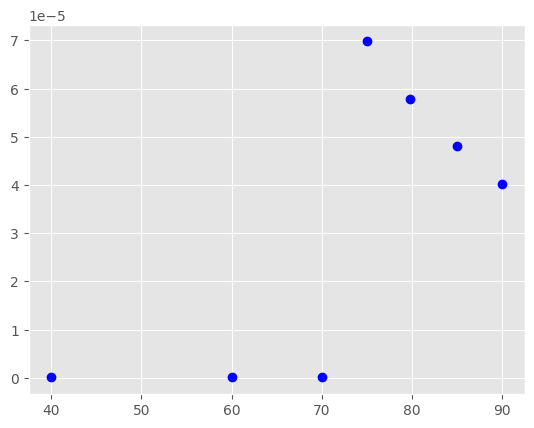

In [188]:
plt.plot(nGe_raw['T'], nGe['sigma'], 'bo', label='raw data')

### Curve fitting for the conductivity of the sample

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.e-05 1.e-09] [[inf inf]
 [inf inf]]


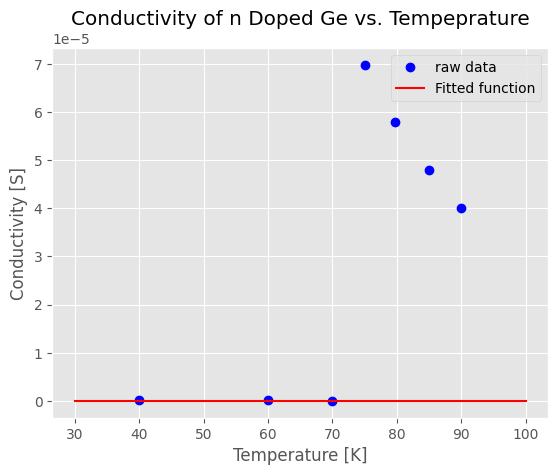

Fitted C:  1e-05
Fitted B:  1e-09


In [189]:
# Define the function with b values as parameters
sigma = lambda T, E, A1, A2: A1 * T**A2 * (kappa*T**(3/2) * np.exp(1/(-2*sc.k) * E / T))
sigma_with_bandgapn = lambda T, A1, A2: sigma(T, nGe['bandgap'][2:], A1, A2)
initial_guess = [1e-5, 1e-9]  # Initial guess

params, covariance = curve_fit(sigma_with_bandgapn, nGe_raw['T'][2:], nGe['sigma'][2:], p0=initial_guess)
print(params, covariance)
# Extract the fitted A values
Cn, Bn = params
T_domain = np.linspace(30, 100, 100)

# Plot the results
plt.plot(nGe_raw['T'], nGe['sigma'], 'bo', label='raw data')
# Given that bandgap varies continuously across temperature, we approximate its value
# by using the closed available band gap value computed with the collected data

approx_band_gap = lambda T: nGe['bandgap'][np.argmin(np.abs(nGe_raw['T'] - T))]

plt.plot(T_domain, sigma(T_domain, np.array([approx_band_gap(Ti) for Ti in T_domain]), Cn, Bn), 'r-', label='Fitted function')
plt.title("Conductivity of n Doped Ge vs. Tempeprature")
plt.xlabel("Temperature [K]")
plt.ylabel("Conductivity [S]")
plt.legend()
plt.show()

# fitted paramater values
print("Fitted C: ", Cn)
print("Fitted B: ", Bn)

Before addressing the curve fit, note that the data for the bandgap energy cannot be accurate from temperatures $\le 70K$. However, a curve fit attempt on the remaining points equally did not yield a fitted curve. The initial guesses remain unchanged and the standard errors for these parameters are 'infinite' indicating a very poor fit. This could be the result of inadequate initial guesses for the parameters or that the values dealt with in the equation are both too large and too small. In the time given, a curve fit cannot be achieved.

# p-doped germanium sample

## Pariwise resistance

In [190]:
pGe_raw = pd.read_csv("pGe.csv")

# We correct the measurements by taking their absolute values
# (I think this is an inconsistency in my experimental setup
#  where the polarity of the wires may be inverted)
# Then convert the values from mV to V
pGe_raw[['V23','V12', 'V41', 'V34', 'V32', 'V21', 'V14', 'V43']] = \
 (1e-3) * np.abs(pGe_raw[['V23','V12', 'V41', 'V34', 'V32', 'V21', 'V14', 'V43']])

pGe = pd.DataFrame()
# Resistance calculation in [Ohms]
pGe['R14_23'] = pGe_raw['I14'] / pGe_raw['V23']
pGe['R43_12'] = pGe_raw['I43'] / pGe_raw['V12']
pGe['R32_41'] = pGe_raw['I32'] / pGe_raw['V41']
pGe['R12_34'] = pGe_raw['I12'] / pGe_raw['V34']
# Reversed orientation
pGe['R41_32'] = pGe_raw['I41'] / pGe_raw['V32']
pGe['R34_21'] = pGe_raw['I34'] / pGe_raw['V21']
pGe['R23_14'] = pGe_raw['I23'] / pGe_raw['V14']
pGe['R21_43'] = pGe_raw['I21'] / pGe_raw['V43']

# Since the voltage and current measurements are obtained using a DMM
# we can use .005 mA and .005 mV uncertainty
# Although the machine precision is better than this uncertainty,
#   the values were not stable beyond 2 decimal places when recording data
resistance_err = (unc.ufloat(1, 0.005) / unc.ufloat(1, 0.005)).s
r_errs = np.ones(len(pGe['R12_34'])) * resistance_err
print(f"Error in resistance: {resistance_err:.3e} [Ohm]")

print("Raw voltages and currents\n", pGe_raw.head())
print("Resistances\n", pGe.head(10))

Error in resistance: 7.071e-03 [Ohm]
Raw voltages and currents
   Name   T   I14       V23   I43       V12   I32       V41   I12       V34  \
0  pGe  40  4.96  0.000061  4.99  0.000059  4.99  0.000061  4.99  0.000059   
1  pGe  60  5.04  0.000068  5.02  0.000067  5.02  0.000070  5.02  0.000068   
2  pGe  70  5.02  0.000070  5.02  0.000070  5.02  0.000072  5.02  0.000070   
3  pGe  75  5.01  0.000070  5.01  0.000070  5.01  0.000072  5.01  0.000070   
4  pGe  80  5.01  0.000069  5.01  0.000069  5.01  0.000071  5.01  0.000070   

    I41       V32   I34       V21   I23       V14   I21       V43  B_field  
0  4.99  0.000061  4.99  0.000059  4.98  0.000060  4.99  0.000059        0  
1  5.02  0.000069  5.02  0.000067  5.02  0.000068  5.01  0.000066        0  
2  5.01  0.000071  5.01  0.000069  5.01  0.000070  5.01  0.000068        0  
3  5.01  0.000071  5.01  0.000069  5.01  0.000070  5.01  0.000068        0  
4  5.01  0.000070  5.01  0.000069  5.01  0.000070  5.01  0.000068        0  
Resis

## Current reversal consistency

In [191]:
print("We now check current reversal consistency for n-doped germanium sample (resistances in [Ohms]): \n",
      pd.concat([pGe_raw['T'],
                 np.abs(pGe['R14_23'] - pGe['R41_32']),
                 np.abs(pGe['R43_12'] - pGe['R34_21']),
                 np.abs(pGe['R32_41'] - pGe['R23_14']),
                 np.abs(pGe['R21_43'] - pGe['R12_34'])],
                axis=1, keys=['T', 'R41_32 - R14_23', 'R34_21 - R43_12', 'R23_14 - R32_41', 'R12_34 - R21_43'])
)

We now check current reversal consistency for n-doped germanium sample (resistances in [Ohms]): 
     T  R41_32 - R14_23  R34_21 - R43_12  R23_14 - R32_41  R12_34 - R21_43
0  40       358.655259       286.700048       924.294211      1001.783881
1  60      1043.694294       447.319646      1920.448870      1861.997821
2  70      1144.802971       589.551615      2169.896395      1643.529298
3  75      1002.352828       937.574076      2302.647355      1878.092668
4  80      1335.014143       105.382722      1518.623600      2342.738722
5  85      2391.304348       445.098915      2593.520082      1576.746695
6  90      1433.691756       401.994375      2493.277116       368.030015


We can see from above that the resistance calculations do  agree with each other under the current reversal consistency to a kOhm difference.

## Reciprocity

The reciprocity theorem states that the sum of opposite pairs of measurements must agree with each other. The NIST guide outlines two such relations in the semiconductor samples:
$$R_{21,34} + R_{12,43} = R_{43,12} + R_{34,21}$$
$$R_{32,41} + R_{23,14} = R_{14,23} + R_{41,32}$$

We will verify this by computing the relative error for both relations in the sample and compare this to a 5% tolerance as described in the NIST guide.

Note the relative error between 2 quantities A and B is given by$$err_r=\left|\frac{B-A}{A}\right|$$

In [192]:
print("We will now verify the reciprocity theorem for pairs of opposite resistances in the samples",
      "\n(R41_32 + R14_23 - (R23_14 + R32_41)) / (R23_14 + R32_41)\n",
       pd.concat([pGe_raw['T'],(pGe['R41_32'] + pGe['R14_23'] - (pGe['R23_14'] + pGe['R32_41'])) / (pGe['R23_14'] + pGe['R32_41'])], axis=1),
      "\n(R34_21 + R43_12 - (R12_43 + R21_34)) / (R12_43 + R21_34)\n",
       pd.concat([pGe_raw['T'],(pGe['R34_21'] + pGe['R43_12'] - (pGe['R14_23'] + pGe['R41_32'])) / (pGe['R14_23'] + pGe['R41_32'])], axis=1),
      )

We will now verify the reciprocity theorem for pairs of opposite resistances in the samples 
(R41_32 + R14_23 - (R23_14 + R32_41)) / (R23_14 + R32_41)
     T         0
0  40 -0.007785
1  60  0.004051
2  70 -0.000899
3  75  0.000493
4  80  0.007131
5  85  0.002897
6  90  0.003720 
(R34_21 + R43_12 - (R12_43 + R21_34)) / (R12_43 + R21_34)
     T         0
0  40  0.034470
1  60  0.019583
2  70  0.022378
3  75  0.019458
4  80  0.012966
5  85  0.011666
6  90  0.026011


In the first reciprocity relation, most values fall below the 5% tolerance and non exceed 6%.

However, in the second reciprocity relation, most values exceed this tolerance and agree with each other to a 10% tolerance instead.

## $R_A, R_B, R_S$

In [193]:
from uncertainties.umath import *

def compute_resistance(RA, RB, tolerance):
  zprev = 0
  z = 2 * np.log(2) / (np.pi*(RA + RB))

  while np.abs((z - zprev) / z) > tolerance:
    zprev = z
    y = 1/exp(np.pi*z*RA) + 1/exp(np.pi*z*RB)
    z = z - (1-y)/np.pi / (RA / exp(np.pi*z*RA) + RB/exp(np.pi*z*RB))

  return abs(1/z) # value of RS

In [194]:
# First we compute intermediary resistance values
# The error in RA and RB is the same as the resistance error since it's averaged out to the same value
pGe['RA'] = (pGe['R41_32'] + pGe['R14_23'] + pGe['R23_14'] + pGe['R32_41']) / 4
pGe['RB'] = (pGe['R34_21'] + pGe['R43_12'] + pGe['R14_23'] + pGe['R41_32']) / 4

# Now we obtain resistance via a relaxation algorithm (outlined by NIST guide)
tolerance = 5e-5
pGe['RS'] = [compute_resistance(ra, rb, tolerance) for ra, rb in zip(pGe['RA'], pGe['RB'])]
RS_err = unp.std_devs([compute_resistance(ra, rb, tolerance) for ra, rb in
                       zip(unp.uarray(pGe['RA'], np.ones(len(pGe['RA']))), unp.uarray(pGe['RB'], np.ones(len(pGe['RB']))))])

print("Uncertainty in RS values [Ohm]:\n", RS_err)

print("Resistance values [Ohm] obtained at varying temperatures\n", pd.concat([pGe_raw['T'], pGe['RS']], axis=1))

Uncertainty in RS values [Ohm]:
 [3.20494417 3.20492765 3.20491619 3.20490894 3.20490969 3.20488738
 3.20496524]
Resistance values [Ohm] obtained at varying temperatures
     T             RS
0  40  374472.484003
1  60  334359.992011
2  70  323382.417967
3  75  322711.955241
4  80  325587.771758
5  85  335240.345392
6  90  351208.837039


## $V_C, V_D, V_E, V_F$

In [195]:
pGeBplus = pd.read_csv("pGepositive.csv")
pGeBminus = pd.read_csv("pGenegative.csv")

# Because measurements were not made correctly according to the van der Pauw method
# for VC, VD, VE, VF, I am approximating the voltage across opposite corners of the sample as
# the euclidean distance of the voltage across pairs of adjacent corners of the sample.
# The idea behind this approximation is that the potential field can be somewhat modelled as a euclidean space
# where each unit of distance represents 1V. This approximation is evidently very dubious,
# however it allows me to recover a possible value for the charge carrier sheet density with the collected data.
# Given more time, additional (and correct) data can be collected.

pGeBplus['V24'] = np.sqrt(pGeBplus['V23']**2 + pGeBplus['V34']**2)
pGeBminus['V24'] = np.sqrt(pGeBminus['V23']**2 + pGeBminus['V34']**2)

pGeBplus['V42'] = np.sqrt(pGeBplus['V32']**2 + pGeBplus['V43']**2)
pGeBminus['V42'] = np.sqrt(pGeBminus['V32']**2 + pGeBminus['V43']**2)

pGeBplus['V13'] = np.sqrt(pGeBplus['V12']**2 + pGeBplus['V23']**2)
pGeBminus['V13'] = np.sqrt(pGeBminus['V12']**2 + pGeBminus['V23']**2)

pGeBplus['V31'] = np.sqrt(pGeBplus['V21']**2 + pGeBplus['V32']**2)
pGeBminus['V31'] = np.sqrt(pGeBminus['V21']**2 + pGeBminus['V32']**2)

pGe['VC'] = pGeBplus['V42'] - pGeBminus['V42']
pGe['VD'] = pGeBplus['V24'] - pGeBminus['V24']
pGe['VE'] = pGeBplus['V13'] - pGeBminus['V13']
pGe['VF'] = pGeBplus['V31'] - pGeBminus['V31']

## Charge carrier density

In [196]:
# since the manual expects a single current measurement for all 4 voltages,
# I am taking the average of the currents corresponding to the voltages involved in the above calculation
# this will allow me to account for the differences in the currents that passed throught the semiconductor at each pair of points.
# Note that since the current value is controlled from the electronic box,
# it is reasonable to expect this total current to flow across terminals of the sample
currents = [pGeBplus['I14'], pGeBminus['I14'],
            pGeBplus['I41'], pGeBminus['I41'],
            pGeBplus['I43'], pGeBminus['I43'],
            pGeBplus['I34'], pGeBminus['I34'],
            pGeBplus['I32'], pGeBminus['I32'],
            pGeBplus['I23'], pGeBminus['I23'],
            pGeBplus['I12'], pGeBminus['I12'],
            pGeBplus['I21'], pGeBminus['I21']]

# average current value with uncertainty
average_current = unc.ufloat(np.mean(currents), np.std(currents))
# magnetic field strength as measured using a portable gaussmeter
magnetic_field_strength = unc.ufloat(413e-3, 413e-5) # Tesla [uncertainty of 1% = 4.13e-3 T]

# First, we compute the charge carrier sheet density
pGe['csd'] = np.abs(average_current * magnetic_field_strength * 8e-8 / sc.e * (unp.uarray(pGe['VC'], r_errs)+ unp.uarray(pGe['VD'], r_errs)+ unp.uarray(pGe['VE'], r_errs)+ unp.uarray(pGe['VF'], r_errs))**(-1))

csd_err = unp.std_devs(np.abs(average_current * magnetic_field_strength * 8e-8 / sc.e * (unp.uarray(pGe['VC'], r_errs)+ unp.uarray(pGe['VD'], r_errs)+ unp.uarray(pGe['VE'], r_errs)+ unp.uarray(pGe['VF'], r_errs))**(-1))
)

print("For n-doped germanium sample, the charge carrier density is found to be n_i[cm^-2] = \n", pGe['csd'])
# print("The error in the charge carrier density is ", csd_err)


# Next we compute the bulk density, given the sample thickness
# the thickness was measured using an electronic calliper in mm, then converted into cm
thickness = 0.06 # cm, thickness of the semiconductor sample [uncertainty of .01 mm]
cbd = pGe['csd'] / thickness
print("For n-doped germanium sample, the bulk charge carrier density is found to be n[cm^-3] = \n", cbd)

For n-doped germanium sample, the charge carrier density is found to be n_i[cm^-2] = 
 0    (2.01+/-0.10)e+12
1      (1.9+/-0.5)e+13
2          (6+/-5)e+13
3      (0.4+/-1.8)e+15
4      (0.5+/-3.4)e+15
5      (0.4+/-1.9)e+15
6      (0.3+/-1.2)e+15
Name: csd, dtype: object
For n-doped germanium sample, the bulk charge carrier density is found to be n[cm^-3] = 
 0    (3.36+/-0.16)e+13
1      (3.2+/-0.8)e+14
2      (1.0+/-0.8)e+15
3      (0.6+/-3.1)e+16
4          (1+/-6)e+16
5      (0.6+/-3.2)e+16
6      (0.5+/-2.0)e+16
Name: csd, dtype: object


## Hall mobility

In [197]:
pGe['mu'] =  (pGe['csd']**(-1)) * (pGe['RS']**(-1)) * 1 / sc.e
# pGe['mu'] =  (pGe['csd']**(1)) * (pGe['RS']**(1)) *  sc.e
print("Hall mobility is given by mu[(cm^2)(V^-1)(s^-1)]=\n", pGe['mu'] )

Hall mobility is given by mu[(cm^2)(V^-1)(s^-1)]=
 0      8.3+/-0.4
1    0.96+/-0.25
2    0.32+/-0.26
3    0.05+/-0.26
4    0.04+/-0.25
5    0.05+/-0.25
6    0.06+/-0.24
Name: mu, dtype: object


## Conductivity, band gap energy

We use the high temperature approximation to reduce the relation to
$$\sigma = \mu\cdot e\cdot n,$$ which further reduces to $$\sigma = \frac{1}{R_S\cdot d}$$ where $R_S$ is the computed sheet resistance and $d$ the measurement sample thickness.

Note that a sample of undoped germanium was not used in this experiment, meaning that the extrinsic and intrinsic carrier densities cannot be seperated. Instead the total or effective density is used as computed above.

This will have repurcussions in the calculation of band gap energy as well. Band gap can be obtained by rearranging the equation (4) from the lab manual
$$\Delta E = \ln\left(csd * \left(\frac{k_BT}{2\pi\hbar^2}\right)^{-\frac{3}{2}}(m_em_h)^{-3/4}\right)\cdot(-2k_BT)$$
where $m_e, m_h$ are the effective masses of electrons and holes respectively:
$$m_e = 0.0815\cdot m_e \qquad m_h = 0.33\cdot m_e$$ where $m_e$ is the rest mass of the electron,
from https://www.ioffe.ru/SVA/NSM/Semicond/Ge/bandstr.html

Let $$\kappa = \left(\frac{k_B}{2\pi\hbar^2}\right)^{\frac{3}{2}}(m_em_h)^{3/4}$$

In [198]:
pGe['sigma'] = (pGe['RS']**(-1)) / thickness

me, mh = 0.0815*sc.m_e, 0.33*sc.m_e
kappa = (sc.k/(2*np.pi*sc.hbar))**(3/2) * (me*mh)**(3/4)
pGe['bandgap'] = np.log(np.abs(unp.nominal_values(pGe['csd'])) * (1/kappa) * (pGe_raw['T']+273.15)**(-3/2))*(-2*sc.k*pGe_raw['T']+273.15)
pGe['sigma'], pGe['bandgap']

(0    0.000045
 1    0.000050
 2    0.000052
 3    0.000052
 4    0.000051
 5    0.000050
 6    0.000047
 Name: sigma, dtype: float64,
 0    24730.721354
 1    25323.551300
 2    25620.135202
 3    26113.280960
 4    26190.822332
 5    26106.981005
 6    26037.031797
 Name: bandgap, dtype: float64)

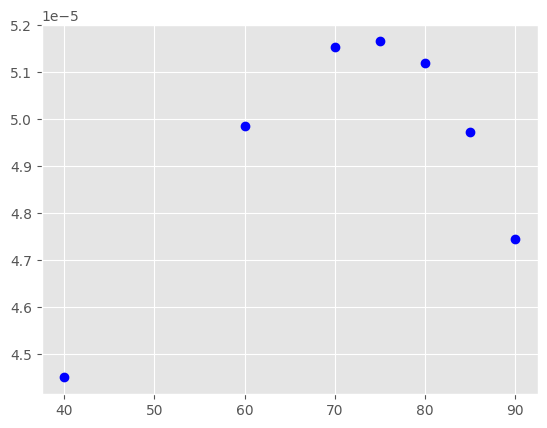

In [199]:
plt.plot(pGe_raw['T'], pGe['sigma'], 'bo', label='raw data')

### Curve fitting for the conductivity of the sample

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.e-05 1.e-09] [[inf inf]
 [inf inf]]


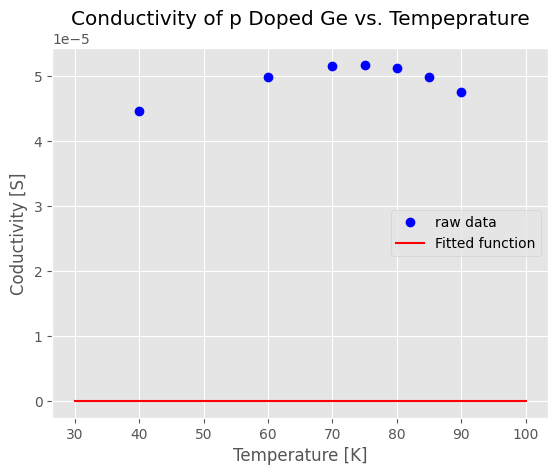

Fitted C:  1e-05
Fitted B:  1e-09


In [200]:
# Define the function with b values as parameters
sigma = lambda T, E, A1, A2: A1 * T**A2 * (kappa*T**(3/2) * np.exp(1/(-2*sc.k) * E / T))
sigma_with_bandgapn = lambda T, A1, A2: sigma(T, pGe['bandgap'][2:], A1, A2)
initial_guess = [1e-5, 1e-9]  # Initial guess

params, covariance = curve_fit(sigma_with_bandgapn, pGe_raw['T'][2:], pGe['sigma'][2:], p0=initial_guess)
print(params, covariance)
# Extract the fitted A values
Cn, Bn = params
T_domain = np.linspace(30, 100, 100)

# Plot the results
plt.plot(pGe_raw['T'], pGe['sigma'], 'bo', label='raw data')
# Given that bandgap varies continuously across temperature, we approximate its value
# by using the closed available band gap value computed with the collected data

approx_band_gap = lambda T: pGe['bandgap'][np.argmin(np.abs(pGe_raw['T'] - T))]

plt.plot(T_domain, sigma(T_domain, np.array([approx_band_gap(Ti) for Ti in T_domain]), Cn, Bn), 'r-', label='Fitted function')
plt.legend()
plt.title("Conductivity of p Doped Ge vs. Tempeprature")
plt.xlabel("Temperature [K]")
plt.ylabel("Coductivity [S]")
plt.show()

# fitted paramater values
print("Fitted C: ", Cn)
print("Fitted B: ", Bn)

The data for the bandgap energy seems more realistic than the data found for the n-doped sample. However for similar reasons, a curve fit attempt did not yield a fitted curve. The initial guesses remain unchanged and the standard errors for these parameters are 'infinite' indicating a very poor fit. This could be the result of inadequate initial guesses for the parameters or that the values dealt with in the equation are both too large and too small. In the time given, a curve fit cannot be achieved.

# Plotting temperature dependence

## Sheet resistance vs. Temperature

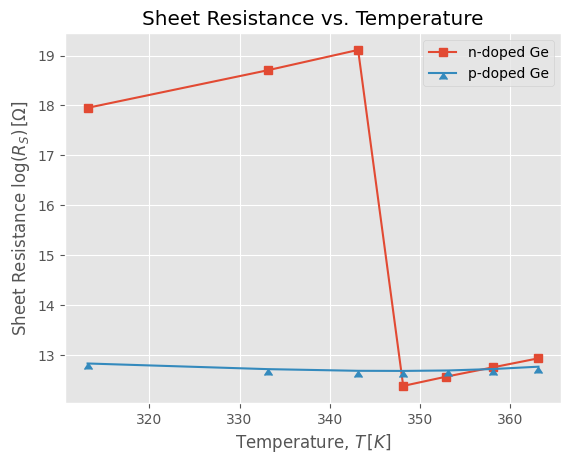

In [201]:
plt.clf()
plt.plot(nGe_raw['T']+273.15, np.log(nGe['RS']), label='n-doped Ge', marker="s")
plt.plot(pGe_raw['T']+273.15, np.log(pGe['RS']), label='p-doped Ge', marker=6)
plt.xlabel("Temperature, $T\,[K]$")
plt.ylabel("Sheet Resistance $\log(R_S)\,[\Omega]$")
plt.title("Sheet Resistance vs. Temperature")
plt.legend()
plt.style.use('ggplot')
plt.show()

## Charge carrier density vs. Temperature

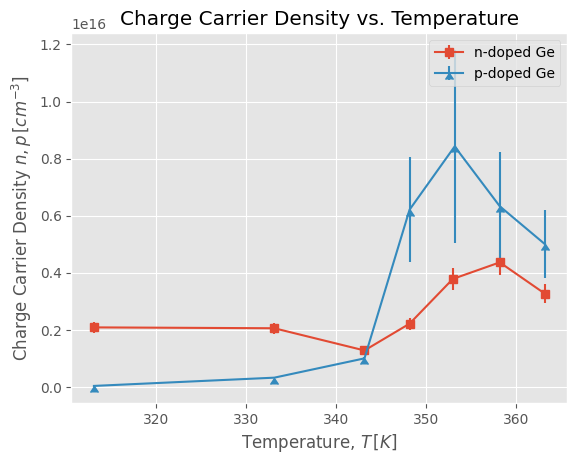

In [202]:
plt.clf()
plt.errorbar(nGe_raw['T']+273.15, unp.nominal_values(nGe['csd'])/thickness, yerr=unp.std_devs(nGe['csd'])*100, label='n-doped Ge', marker="s")
plt.errorbar(pGe_raw['T']+273.15, unp.nominal_values(pGe['csd'])/thickness, yerr=unp.std_devs(pGe['csd']), label='p-doped Ge', marker=6)
plt.xlabel("Temperature, $T\,[K]$")
plt.ylabel("Charge Carrier Density $n, p\,[cm^{-3}]$")
plt.title("Charge Carrier Density vs. Temperature")
plt.legend()
plt.style.use('ggplot')
plt.show()

Error bars on n doped increased for visibility.

## Hall mobility vs. Temperature

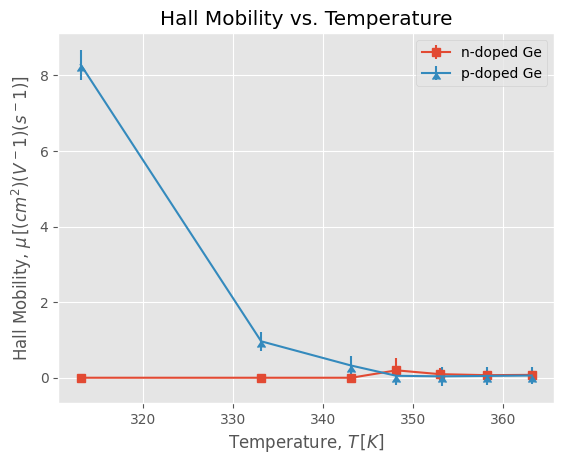

In [203]:
plt.clf()
plt.errorbar(nGe_raw['T']+273.15, unp.nominal_values(nGe['mu']), yerr=unp.std_devs(nGe['mu'])*100, label='n-doped Ge', marker="s")
plt.errorbar(pGe_raw['T']+273.15, unp.nominal_values(pGe['mu']), yerr=unp.std_devs(pGe['mu']), label='p-doped Ge', marker=6)
plt.xlabel("Temperature, $T\,[K]$")
plt.ylabel("Hall Mobility, $\mu\,[(cm^2)(V^-1)(s^-1)]$")
plt.title("Hall Mobility vs. Temperature")
plt.legend()
plt.style.use('ggplot')
plt.show()

## Conductivity vs. Temperature

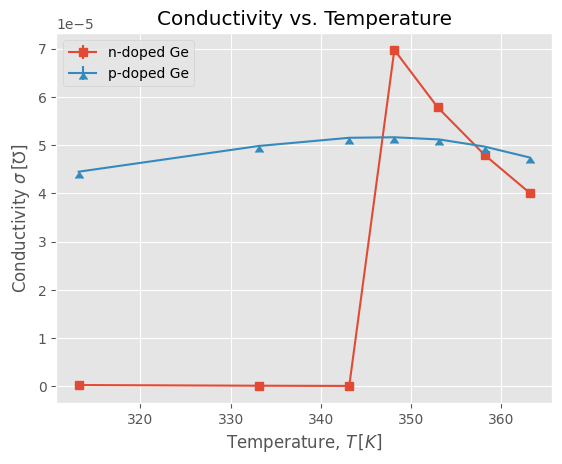

In [204]:
plt.clf()
plt.errorbar(nGe_raw['T']+273.15, unp.nominal_values(nGe['sigma']), yerr=unp.std_devs(nGe['sigma']), label='n-doped Ge', marker="s")
plt.errorbar(pGe_raw['T']+273.15, unp.nominal_values(pGe['sigma']), yerr=unp.std_devs(pGe['sigma']), label='p-doped Ge', marker=6)
plt.xlabel("Temperature, $T\,[K]$")
plt.ylabel("Conductivity $\sigma\,[\mho]$")
plt.title("Conductivity vs. Temperature")
plt.legend()
plt.style.use('ggplot')
plt.show()

## Bandgap Energy vs. Temperature

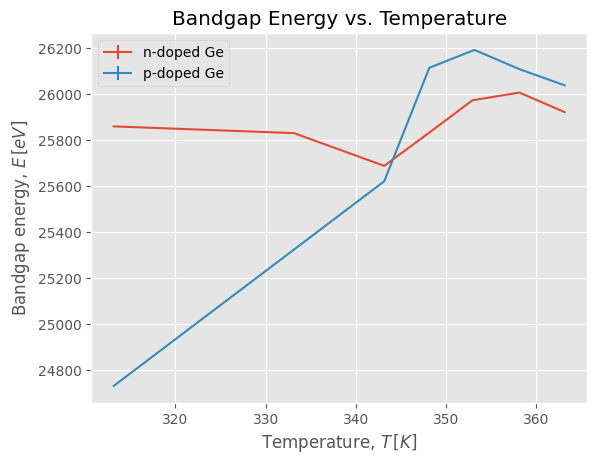

In [205]:
plt.clf()
plt.errorbar(nGe_raw['T']+273.15, unp.nominal_values(nGe['bandgap']), yerr=unp.std_devs(nGe['bandgap']), label='n-doped Ge')#, marker="s")
plt.errorbar(pGe_raw['T']+273.15, unp.nominal_values(pGe['bandgap']), yerr=unp.std_devs(pGe['bandgap']), label='p-doped Ge')#, marker=6)
plt.xlabel("Temperature, $T\,[K]$")
plt.ylabel("Bandgap energy, $E\,[eV]$")
plt.title("Bandgap Energy vs. Temperature")
plt.legend()
plt.style.use('ggplot')
plt.show()